Regresión de Huber (HuberRegressor)
=====

* Regresión lineal con regularización L2 que es robusta a outliers.

 * Difiere de Ridge porque aplica una pérdida lineal a los puntos que son clasificados como outliers.

* No ignora el efecto de los outliers pero si lo minimiza.

In [1]:
import numpy as np
from sklearn.datasets import make_regression

#
# Generación de datos
#
rng = np.random.RandomState(0)
X, y = make_regression(
    n_samples=20,
    n_features=1,
    random_state=0,
    noise=4.0,
    bias=100.0,
)

X, y

(array([[-0.15135721],
        [ 0.40015721],
        [ 0.97873798],
        [-0.85409574],
        [-0.97727788],
        [ 0.3130677 ],
        [-0.10321885],
        [-0.20515826],
        [ 0.33367433],
        [ 1.49407907],
        [ 0.95008842],
        [ 0.12167502],
        [ 1.45427351],
        [ 1.86755799],
        [ 0.14404357],
        [ 0.4105985 ],
        [ 0.76103773],
        [ 2.2408932 ],
        [ 0.44386323],
        [ 1.76405235]]),
 array([ 98.01970393, 108.45865411, 107.77654399,  90.31520078,
         92.04796546, 100.14472604, 104.37128562,  95.20896669,
        102.50526212, 122.11966081, 112.28760019, 107.32614044,
        121.44454917, 125.80345967, 104.3306721 , 112.02618102,
        106.59661396, 129.8571502 , 113.51286154, 125.42202601]))

In [2]:
#
# Adiciona cuatro outliers fuertes al dataset
#
X_outliers = rng.normal(0, 0.5, size=(4, 1))
y_outliers = rng.normal(0, 2.0, size=4)

X_outliers[:2, :] += X.max() + X.mean() / 4.0
X_outliers[2:, :] += X.min() - X.mean() / 4.0

y_outliers[:2] += y.min() - y.mean() / 4.0
y_outliers[2:] += y.max() + y.mean() / 4.0

X = np.vstack((X, X_outliers))
y = np.concatenate((y, y_outliers))

In [3]:
from sklearn.linear_model import HuberRegressor

huberRegressor = HuberRegressor(
    # -------------------------------------------------------------------------
    # The parameter epsilon controls the number of samples that should be
    # classified as outliers. The smaller the epsilon, the more robust it is to
    # outliers.
    epsilon=1.35,
    # -------------------------------------------------------------------------
    # Maximum number of iterations that
    # scipy.optimize.minimize(method="L-BFGS-B") should run for.
    max_iter=100,
    # -------------------------------------------------------------------------
    # Strength of the squared L2 regularization. Note that the penalty is equal
    # to alpha * ||w||^2.
    alpha=0.0001,
    # -------------------------------------------------------------------------
    # Whether or not to fit the intercept. This can be set to False if the data
    # is already centered around the origin.
    fit_intercept=True,
)

huberRegressor.fit(X, y)

HuberRegressor()

In [4]:
from sklearn.linear_model import Ridge

ridge = Ridge(
    fit_intercept=True,
    alpha=0.0,
    random_state=0,
)

ridge.fit(X, y)

Ridge(alpha=0.0, random_state=0)

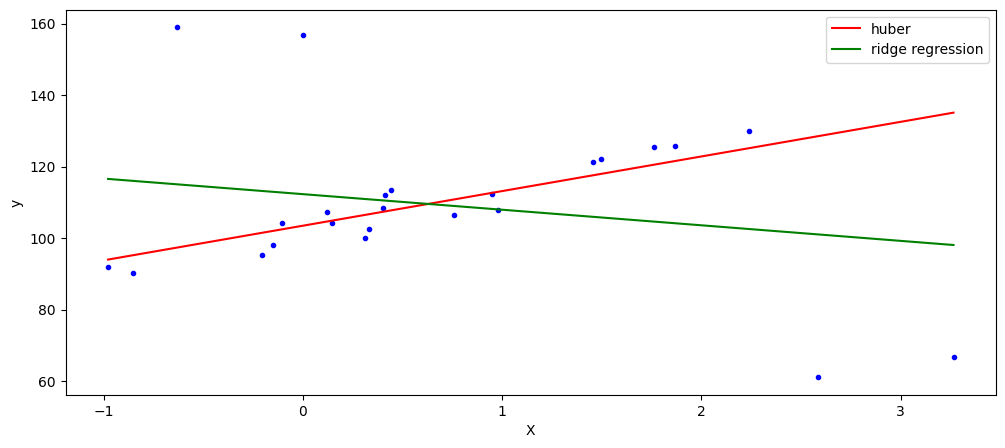

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
plt.plot(X, y, "b.")

x = np.linspace(X.min(), X.max(), 7).reshape(-1,1)

plt.plot(x, huberRegressor.predict(x), 'r-', label="huber")
plt.plot(x, ridge.predict(x), "g-", label="ridge regression")
plt.xlabel("X")
plt.ylabel("y")
plt.legend(loc=0)
plt.show()